In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime as dt
%matplotlib inline

In [7]:
orders = pd.read_csv('Orders.csv')
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/21,11/11/21,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/21,11/11/21,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/21,6/16/21,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/20,10/18/20,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/20,10/18/20,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
orders.shape

(9994, 21)

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders['Ship Date'] = pd.to_datetime(orders['Ship Date'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [12]:
orders.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
orders.duplicated().sum() 

0

In [14]:
#check for missing values
orders.isnull().values.any() 

False

In [15]:
#check for the unique values in each column
for col in orders.columns:
    unique_count = orders[col].nunique()
    print(col +  " has " + str(unique_count) + " unique values")

Row ID has 9994 unique values
Order ID has 5009 unique values
Order Date has 1236 unique values
Ship Date has 1334 unique values
Ship Mode has 4 unique values
Customer ID has 793 unique values
Customer Name has 793 unique values
Segment has 3 unique values
Country has 1 unique values
City has 531 unique values
State has 49 unique values
Postal Code has 631 unique values
Region has 4 unique values
Product ID has 1862 unique values
Category has 3 unique values
Sub-Category has 17 unique values
Product Name has 1850 unique values
Sales has 5825 unique values
Quantity has 14 unique values
Discount has 12 unique values
Profit has 7287 unique values


In [16]:
#customer segmentation by state
orders.groupby(['State'])['Customer ID'].nunique().sort_values(ascending=False)

State
California              577
New York                415
Texas                   370
Pennsylvania            257
Illinois                237
Washington              224
Ohio                    202
Florida                 181
North Carolina          122
Virginia                107
Michigan                106
Arizona                 100
Tennessee                84
Georgia                  83
Colorado                 75
Indiana                  70
Massachusetts            62
New Jersey               61
Kentucky                 58
Wisconsin                52
Oregon                   51
Maryland                 45
Connecticut              43
Delaware                 43
Minnesota                42
Alabama                  34
Oklahoma                 34
Missouri                 28
Arkansas                 27
Utah                     26
Rhode Island             25
Mississippi              25
Nevada                   23
Nebraska                 23
New Mexico               22
Louisiana     

**RFM Modeling**

In [17]:
#to find the latest invoice date
print(orders['Order Date'].sort_values(ascending=False).iloc[0])

2022-12-30 00:00:00


In [18]:
latest_date = dt.datetime(2022,12,30)

In [19]:
#recency
recency=orders.groupby(['Customer ID']).agg({'Order Date':lambda x:((latest_date-x.max()).days)})
recency.head()

,Order Date
Customer ID,
AA-10315,184
AA-10375,19
AA-10480,259
AA-10645,55
AB-10015,415


In [20]:
#frequency
frequency=orders.groupby('Customer ID').agg({'Order ID':lambda x:len(x)})
frequency.head()

,Order ID
Customer ID,
AA-10315,11
AA-10375,15
AA-10480,12
AA-10645,18
AB-10015,6


In [21]:
#monetary
monetary=orders.groupby('Customer ID').agg({'Sales':lambda x:sum(x)})
monetary.head()

,Sales
Customer ID,
AA-10315,5563.560
AA-10375,1056.390
AA-10480,1790.512
AA-10645,5086.935
AB-10015,886.156


In [22]:
RFM=pd.concat([recency,frequency,monetary], axis=1)
RFM.rename(columns={'Order Date':'Recency',
                    'Order ID': 'Frequency',
                    'Sales': 'Monetary'},inplace=True)
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,11,5563.560
AA-10375,19,15,1056.390
AA-10480,259,12,1790.512
AA-10645,55,18,5086.935
AB-10015,415,6,886.156


In [23]:
RFM.describe()

,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,146.773014,12.602774,2896.848500
std,186.111367,6.242559,2628.670117
min,0.000000,1.000000,4.833000
25%,30.000000,8.000000,1146.050000
50%,75.000000,12.000000,2256.394000
75%,183.000000,16.000000,3785.276000
max,1165.000000,37.000000,25043.050000


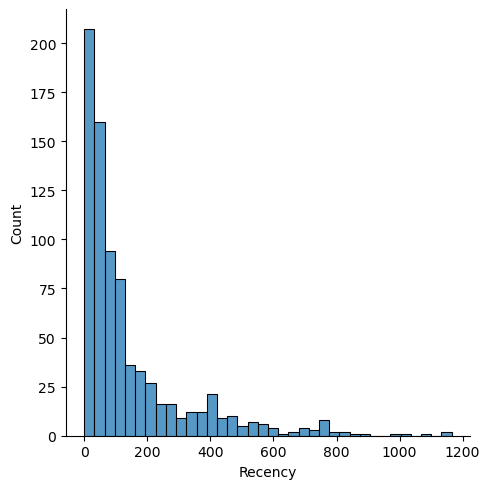

In [24]:
#Recency distribution plot
x = RFM['Recency']
ax = sns.displot(x)

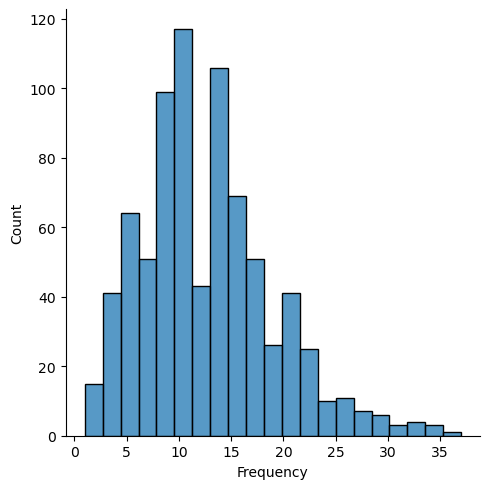

In [25]:
#frequency distribution plot
x = RFM['Frequency']
ax = sns.displot(x)

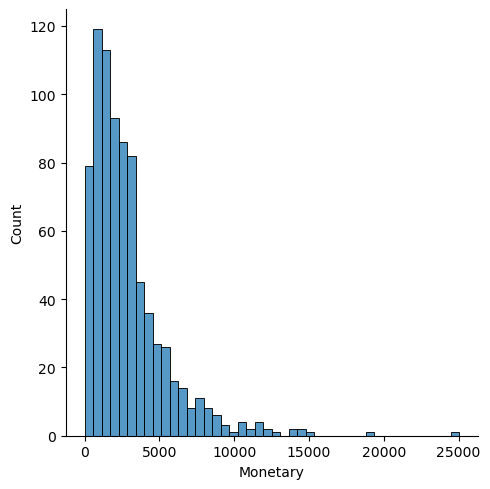

In [26]:
#monetary distribution plot
x = RFM['Monetary']
ax = sns.displot(x)

In [27]:
#split into four segments using quantiles
quantiles = RFM.quantile(q=[0.25,0.5,0.75],axis=0,numeric_only=True)
quantiles

,Recency,Frequency,Monetary
0.25,30.0,8.0,1146.050
0.50,75.0,12.0,2256.394
0.75,183.0,16.0,3785.276


In [28]:
#create functions to assign R, F and M segment values
def r_score(x):
    if x<=quantiles['Recency'][.25]:
        return 4
    elif x<= quantiles['Recency'][.5]:
        return 3
    elif x<= quantiles['Recency'][.75]:
        return 2
    else:
        return 1
    
def fm_score(x,fm):
    if x<=quantiles[fm][.25]:
        return 1
    elif x<= quantiles[fm][.5]:
        return 2
    elif x<= quantiles[fm][.75]:
        return 3
    else:
        return 4

In [29]:
RFM['R']=RFM['Recency'].apply(lambda x:r_score(x))
RFM['F']=RFM['Frequency'].apply(lambda x:fm_score(x,'Frequency'))
RFM['M']=RFM['Monetary'].apply(lambda x:fm_score(x,'Monetary'))
RFM.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
AA-10315,184,11,5563.560,1,2,4
AA-10375,19,15,1056.390,4,3,1
AA-10480,259,12,1790.512,1,2,2
AA-10645,55,18,5086.935,3,4,4
AB-10015,415,6,886.156,1,1,1


In [30]:
#add RFM_Group column to show concatenated RFM score
RFM['RFM_Group']=RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)

#add RFM_Score to show the sum of RFM_Group values
RFM['RFM_Score']=RFM[['R','F','M']].sum(axis=1)
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
Customer ID,,,,,,,,
AA-10315,184,11,5563.560,1,2,4,124,7
AA-10375,19,15,1056.390,4,3,1,431,8
AA-10480,259,12,1790.512,1,2,2,122,5
AA-10645,55,18,5086.935,3,4,4,344,11
AB-10015,415,6,886.156,1,1,1,111,3


In [31]:
#Assign loyalty level to each customer
Loyalty_Level = ['Bronze','Silver','Gold','Platinum']
Score_cuts = pd.qcut(RFM.RFM_Score,q=4,labels= Loyalty_Level)
RFM['RFM_Loyalty_level'] = Score_cuts.values
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_level
Customer ID,,,,,,,,,
AA-10315,184,11,5563.560,1,2,4,124,7,Silver
AA-10375,19,15,1056.390,4,3,1,431,8,Gold
AA-10480,259,12,1790.512,1,2,2,122,5,Bronze
AA-10645,55,18,5086.935,3,4,4,344,11,Platinum
AB-10015,415,6,886.156,1,1,1,111,3,Bronze


In [32]:
#Validate the data for RFMGroup = 111
RFM[RFM['RFM_Group']=='111'].sort_values('Recency', ascending=False).head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_level
Customer ID,,,,,,,,,
NB-18580,1165,2,273.872,1,1,1,111,3,Bronze
RE-19405,1097,1,48.360,1,1,1,111,3,Bronze
PC-19000,881,3,1061.488,1,1,1,111,3,Bronze
DP-13165,811,4,1058.616,1,1,1,111,3,Bronze
LS-17230,776,6,368.880,1,1,1,111,3,Bronze
KW-16570,770,5,449.096,1,1,1,111,3,Bronze
HD-14785,768,7,251.360,1,1,1,111,3,Bronze
GP-14740,764,5,236.530,1,1,1,111,3,Bronze
JJ-15760,752,3,195.000,1,1,1,111,3,Bronze


**K-Means Clustering**

In [33]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_zero(num):
    if num <=0:
        return 1
    else:
        return num

#Apply handle_neg_zero function to Recency and Monetary columns
RFM['Recency'] = [handle_neg_zero(x) for x in RFM.Recency]
RFM['Monetary'] = [handle_neg_zero(x) for x in RFM.Monetary]
    
#Perform log transformation to bring data into normal or near normal distribution
log_tfd_data = RFM[['Recency', 'Frequency','Monetary']].apply(np.log, axis=1).round(3)

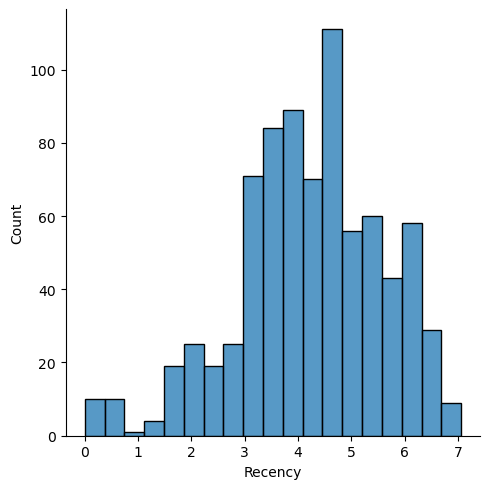

In [34]:
#recency distribution plot after data normalization
Recency_Plot = log_tfd_data['Recency']
ax = sns.displot(Recency_Plot)

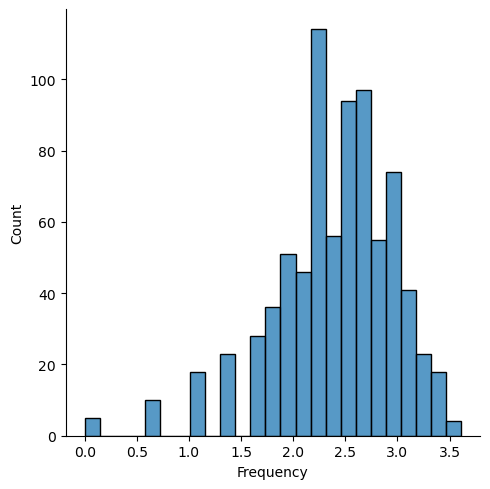

In [35]:
#frequency distribution plot after data normalization
Frequency_Plot = log_tfd_data['Frequency']
ax = sns.displot(Frequency_Plot)

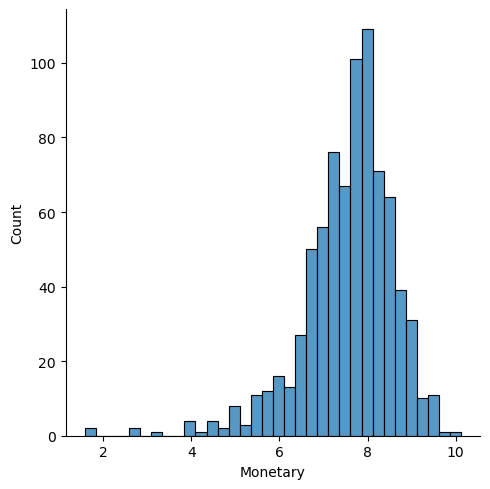

In [36]:
#monetary distribution plot after data normalization
Monetary_Plot = log_tfd_data['Monetary']
ax = sns.displot(Monetary_Plot)

In [37]:
#Bring the data on the same scale
scaler = StandardScaler()
Scaled_data = scaler.fit_transform(log_tfd_data)

#Transform it back to dataframe
Scaled_data = pd.DataFrame(Scaled_data, index = RFM.index, columns=log_tfd_data.columns)
Scaled_data.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,0.717440,0.006827,1.010427
AA-10375,-0.950453,0.549937,-0.564898
AA-10480,0.968616,0.159248,-0.065081
AA-10645,-0.169753,0.868795,0.925069
AB-10015,1.314533,-1.054866,-0.731820


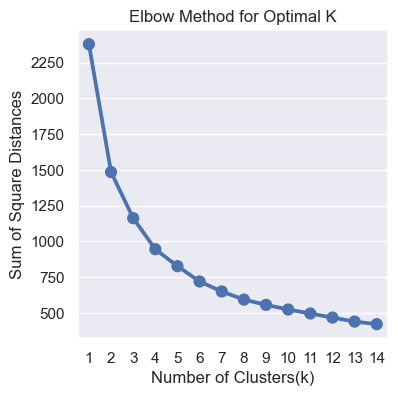

In [38]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters = k,init='k-means++', max_iter =50,n_init=10)
    km = km.fit(Scaled_data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the within-cluster sum of squares against the number of clusters
sns.set(rc={"figure.figsize":(4,4)})
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [42]:
#Perform K-Mean Clustering
KMean_cluster = KMeans(n_clusters = 3, init='k-means++', max_iter = 50,n_init=10)
KMean_cluster.fit(Scaled_data)

RFM['Cluster'] = KMean_cluster.labels_
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_level,Cluster
Customer ID,,,,,,,,,,
AA-10315,184,11,5563.560,1,2,4,124,7,Silver,0
AA-10375,19,15,1056.390,4,3,1,431,8,Gold,2
AA-10480,259,12,1790.512,1,2,2,122,5,Bronze,0
AA-10645,55,18,5086.935,3,4,4,344,11,Platinum,2
AB-10015,415,6,886.156,1,1,1,111,3,Bronze,1


[Text(0.5, 1.0, 'Recency for each cluster')]

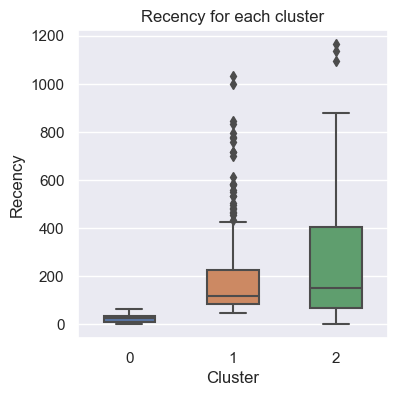

In [40]:
sns.boxplot(x= 'Cluster', y='Recency', data=RFM, width=0.5).set(title='Recency for each cluster')

[Text(0.5, 1.0, 'Frequency for each cluster')]

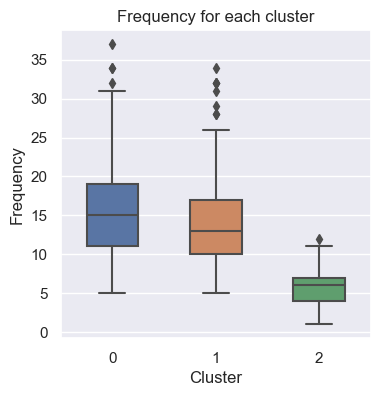

In [41]:
sns.boxplot(x= 'Cluster', y='Frequency', data=RFM, width=0.5).set(title='Frequency for each cluster')

[Text(0.5, 1.0, 'Monetary for each cluster')]

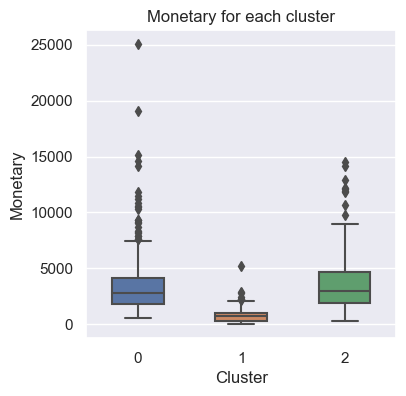

In [43]:
sns.boxplot(x= 'Cluster', y='Monetary', data=RFM, width=0.5).set(title='Monetary for each cluster')

In [44]:
def func(row):
    if row['Cluster'] == 1:
        return 'Whales'
    elif row['Cluster'] == 0:
        return 'Lapsed'
    else:
        return 'Promising'
RFM['Group']=RFM.apply(func, axis=1)
RFM

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_level,Cluster,Group
Customer ID,,,,,,,,,,,
AA-10315,184,11,5563.560,1,2,4,124,7,Silver,0,Lapsed
AA-10375,19,15,1056.390,4,3,1,431,8,Gold,2,Promising
AA-10480,259,12,1790.512,1,2,2,122,5,Bronze,0,Lapsed
AA-10645,55,18,5086.935,3,4,4,344,11,Platinum,2,Promising
AB-10015,415,6,886.156,1,1,1,111,3,Bronze,1,Whales
...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,43,28,2374.658,3,4,3,343,10,Gold,2,Promising
YC-21895,4,8,5454.350,4,1,4,414,9,Gold,2,Promising
YS-21880,9,12,6720.444,4,2,4,424,10,Gold,2,Promising


In [45]:
result=RFM.Group.value_counts()
result

Lapsed       324
Promising    281
Whales       188
Name: Group, dtype: int64

<Axes: title={'center': 'Percentage for each cluster'}>

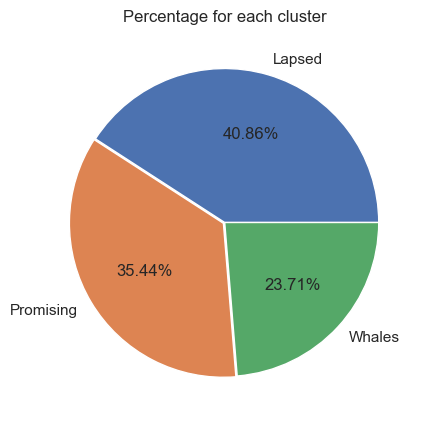

In [46]:
explode = (0,0.01,0)
RFM['Group'].value_counts().plot(kind='pie', 
                                 figsize=(5,5),
                                 title= 'Percentage for each cluster', 
                                 autopct="%.2f%%",
                                 ylabel='',
                                 explode=explode)

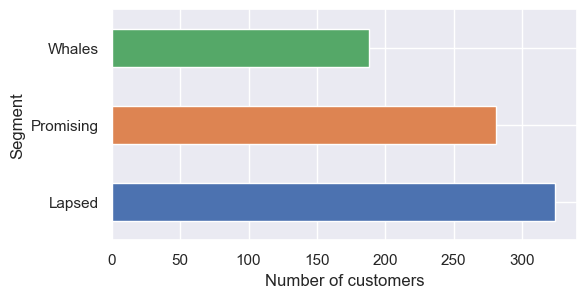

In [49]:
result.plot(kind='barh', color=['C0', 'C1', 'C2'], figsize=(6,3), width=0.5)
plt.xlabel('Number of customers')
plt.ylabel('Segment')
plt.show()